## EN2550: Assignment 03 on Object Counting on a Conveyor Belt

### Connected Component Analysis

#### In this part, we will generate an indexed image representing connected components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).

Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. This is done for you.

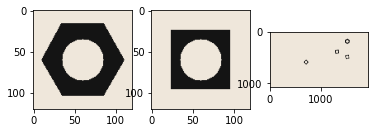

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

#### Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. See https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html for a guide. State the threshold value (automatically) selected in the operation. Display the output images.

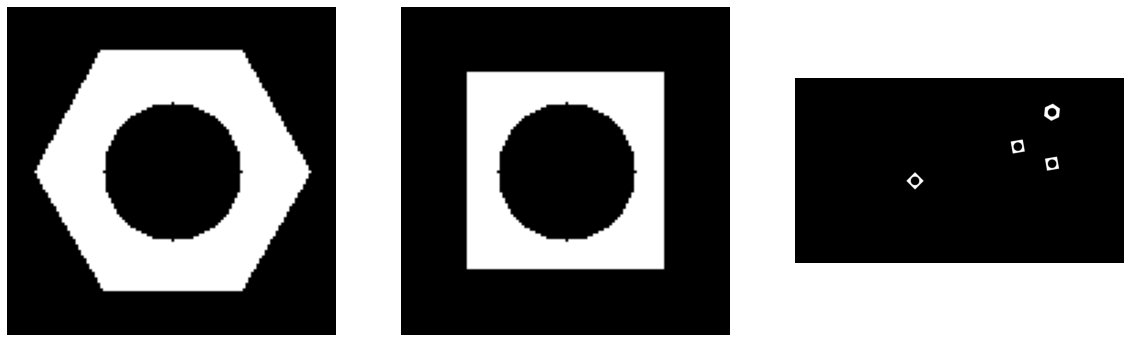

treshold value for hexnut 20.0
treshold value for squrenut 20.0
treshold value for conveyor 20.0


In [3]:
hexnut_template_gray = cv.cvtColor(hexnut_template, cv.COLOR_RGB2GRAY)
squarenut_template_gray =cv.cvtColor(squarenut_template, cv.COLOR_RGB2GRAY)
conveyor_f100_gray =  cv.cvtColor(conveyor_f100, cv.COLOR_RGB2GRAY)

ret_hex,th_hex = cv.threshold(hexnut_template_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret_square,th_square = cv.threshold(squarenut_template_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret_f100,th_f100 = cv.threshold(conveyor_f100_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

fig, ax = plt. subplots(1,3,figsize = (20,20))
ax[0].imshow(cv.cvtColor(th_hex, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(th_square, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(th_f100, cv.COLOR_RGB2BGR))

for i in range(0,3):
    ax[i].set_axis_off()
plt.show()
print('treshold value for hexnut',ret_hex)
print('treshold value for squrenut',ret_square)
print('treshold value for conveyor',ret_f100)

#### Carry out morphological closing to remove small holes inside the foreground. Use a 
3
×
3
 kernel. See https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html for a guide.

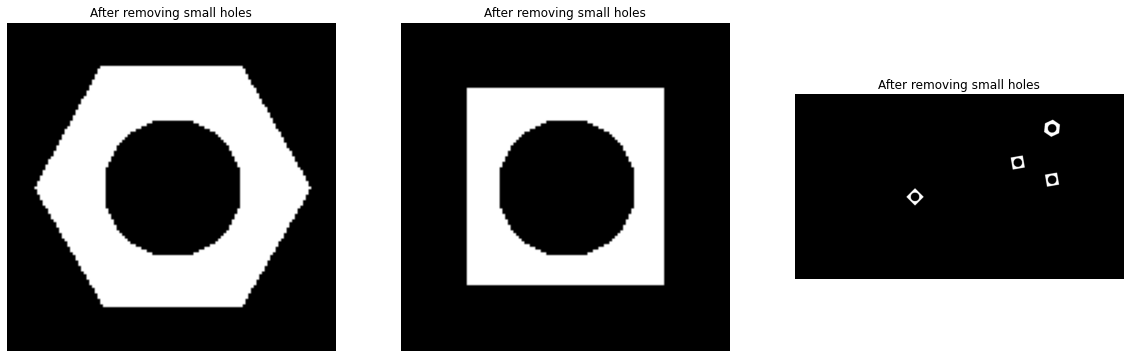

In [4]:
# kernel=np.ones((3,3),np.uint8)
kernel= cv.getStructuringElement(cv.MORPH_RECT,(3,3))
closing_hexnut = cv.morphologyEx(th_hex, cv.MORPH_CLOSE, kernel)
closing_squrenut = cv.morphologyEx(th_square, cv.MORPH_CLOSE, kernel)
closing_conveyor_f100 = cv.morphologyEx(th_f100, cv.MORPH_CLOSE, kernel)
fig, ax = plt. subplots(1,3,figsize = (20,20))
ax[0].imshow(cv.cvtColor(closing_hexnut, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(closing_squrenut, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(closing_conveyor_f100, cv.COLOR_RGB2BGR))
for i in range(0,3):
    ax[i].set_axis_off()
    ax[i].set_title('After removing small holes')
plt.show()

#### Connected components analysis: apply the connectedComponentsWithStats function (see https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f) and display the outputs as colormapped images. Answer the following questions
How many connected components are detected in each image?
What are the statistics? Interpret these statistics.
What are the centroids?
For the hexnut template, you should get the object area in pixel as approximately 4728.

In [5]:
connectivity=8
retval_h, labels_h, stats_h, centroids_h=cv.connectedComponentsWithStats(closing_hexnut, connectivity,ltype = cv.CV_32S  )
retval_s, labels_s, stats_s, centroids_s=cv.connectedComponentsWithStats(closing_squrenut, connectivity,ltype = cv.CV_32S  )
retval_c, labels_c, stats_c, centroids_c=cv.connectedComponentsWithStats(closing_conveyor_f100, connectivity,ltype = cv.CV_32S  )

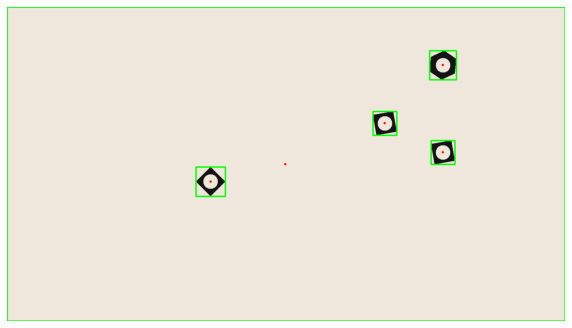

In [101]:
# loop over the number of unique connected component labels
output = conveyor_f100.copy()
for i in range(0, retval_c):
	# extract the connected component statistics and centroid for the current label
	x = stats_c[i, cv.CC_STAT_LEFT]
	y = stats_c[i, cv.CC_STAT_TOP]
	w = stats_c[i, cv.CC_STAT_WIDTH]
	h = stats_c[i, cv.CC_STAT_HEIGHT]
	area = stats_c[i, cv.CC_STAT_AREA]
	(cX, cY) = centroids_c[i]	
	cv.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
	cv.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)
   
	

fig, ax = plt. subplots(1,1,figsize = (10,10))
ax.set_axis_off()
plt.imshow(cv.cvtColor(output, cv.COLOR_RGB2BGR))

In [6]:
#number of labels including the background label= retval
print('The number of components in hex template image:', retval_h-1)
print('The number of components in square template image:', retval_s-1)
print('The number of components in belt image:', retval_c-1)

#stats
print('Statistics of background in hex template image:',stats_h[0])
print('Statistics of component 1 in hex template image:',stats_h[1])
print('Statistics of background in square template image:',stats_s[0])
print('Statistics of component 1 in square template image:',stats_s[1])
print('Statistics of background in belt image:',stats_c[0])
print('Statistics of component 1 in belt image:',stats_c[1])
print('Statistics of component 1 in belt image:',stats_c[2])
print('Statistics of component 1 in belt image:',stats_c[3])
print('Statistics of component 1 in belt image:',stats_c[4])
#centroids
print('Coordinates of Centroid of background in hex template image:',centroids_h[0])
print('Coordinates of Centroid of component in hex template image:',centroids_h[1])
print('Coordinates of Centroid of background in square template image:',centroids_s[0])
print('Coordinates of Centroid of component in square template image:',centroids_s[1])
print('Coordinates of Centroid of background in belt image:',centroids_c[0])
print('Coordinates of Centroid of component1 in belt image:',centroids_c[1])
print('Coordinates of Centroid of component2 in belt image:',centroids_c[2])
print('Coordinates of Centroid of component3 in belt image:',centroids_c[3])
print('Coordinates of Centroid of component4 in belt image:',centroids_c[4])


The number of components in hex template image: 1
The number of components in square template image: 1
The number of components in belt image: 4
Statistics of background in hex template image: [   0    0  120  120 9672]
Statistics of component 1 in hex template image: [  10   16  101   88 4728]
Statistics of background in square template image: [    0     0   120   120 11173]
Statistics of component 1 in square template image: [  24   24   72   72 3227]
Statistics of background in belt image: [      0       0    1920    1080 2059646]
Statistics of component 1 in belt image: [1454  150   92  100 4636]
Statistics of component 1 in belt image: [1259  359   82   82 3087]
Statistics of component 1 in belt image: [1459  459   82   82 3087]
Statistics of component 1 in belt image: [ 650  550  101  101 3144]
Coordinates of Centroid of background in hex template image: [59.33684864 59.63513234]
Coordinates of Centroid of component in hex template image: [59.83375635 59.22356176]
Coordinates of 

#### Contour analysis: Use findContours function to retrieve the extreme outer contours. (see https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html for help and https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0 for information.

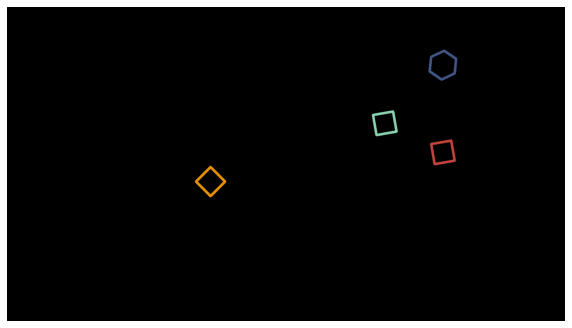

In [98]:
import random 
contours_f100, hierarchy_f100 = cv.findContours(th_f100, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Visualizing contours
im_contours_belt = np.zeros((conveyor_f100_gray.shape[0],conveyor_f100_gray.shape[1],3), dtype= np.uint8)
for i in range (len(contours_f100)):
    color= (random.randint(0,256), random.randint(0,256), random.randint(0,256))
    cv.drawContours(im_contours_belt, contours_f100, i, color, 7,cv.LINE_8,hierarchy_f100,0)
    

fig, ax = plt. subplots(1,1,figsize = (10,10))
ax.set_axis_off()
plt.imshow(im_contours_belt)

### Detecting Objects on a Synthetic Conveyor

#### In this section, we will use the synthetic conveyor.mp4 sequence to count the two types of nuts.

In [104]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


#### Count the number of matching hexagonal nuts in conveyor_f100.png. You can use matchCountours function as shown in https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html to match contours in each frame with that in th template.

In [129]:

contours_hex, hierarchy_hex = cv.findContours(th_hex, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnt1 = contours_hex[0]
contours_tar, hierarchy_tar = cv.findContours(th_f100, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnt2 = contours_tar[0]
list=[]
for i in range (len(contours_tar)):

    r= cv.matchShapes(cnt1,contours_tar[i],1,0.0)
    if r< 0.001:
        list.append(r)
        print(r)
print('Number of matching hexogonal nuts',len(list))
print(' hex template countour area',cv.contourArea(cnt1))

8.228790019826349e-05
Number of matching hexogonal nuts 1
 hex template countour area 6546.5


#### Count the number of objects that were conveyed along the conveyor belt: Display the count in the current frame and total count upto the current frame in the output video. Please compress your video (using Handbreak or otherwise) before uploading. It would be good to experiment first with the two adjacent frames conveyor_f100.png and conveyor_f101.png. In order to disregard partially appearing nuts, consider comparing the contour area in addition to using the matchCountours function.